In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("bikes_rent.csv")
print(df.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


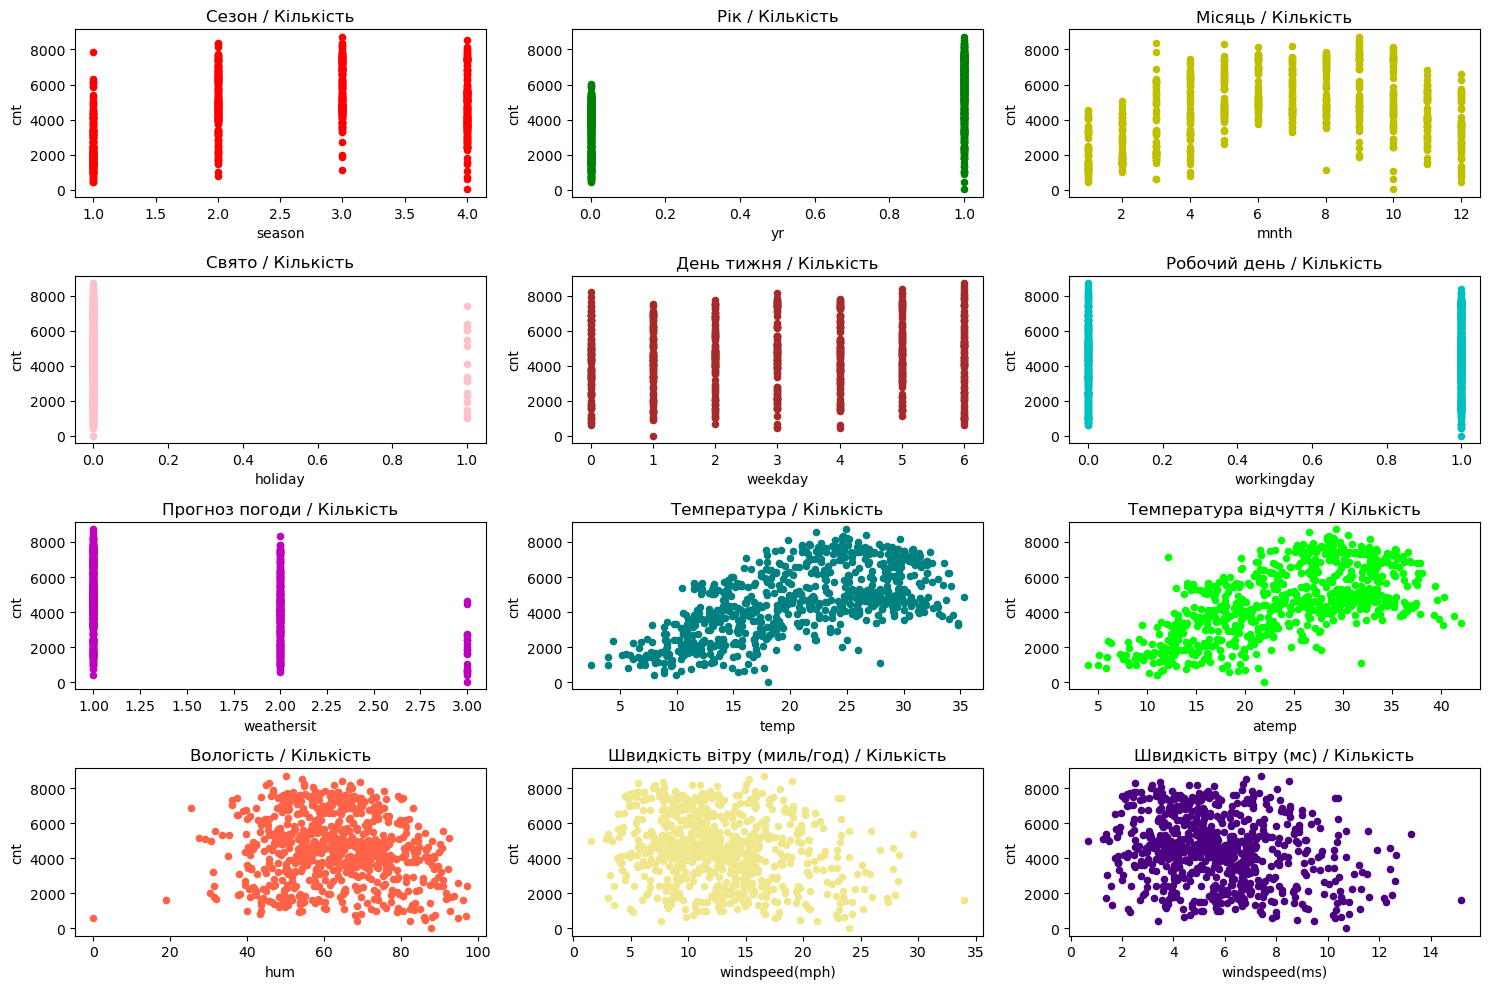

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
df.plot(kind='scatter', x='season', y='cnt', color='r', ax=axes[0, 0])
df.plot(kind='scatter', x='yr', y='cnt', color='g', ax=axes[0, 1])
df.plot(kind='scatter', x='mnth', y='cnt', color='y', ax=axes[0, 2])
df.plot(kind='scatter', x='holiday', y='cnt', color='pink', ax=axes[1, 0])
df.plot(kind='scatter', x='weekday', y='cnt', color='brown', ax=axes[1, 1])
df.plot(kind='scatter', x='workingday', y='cnt', color='c', ax=axes[1, 2])
df.plot(kind='scatter', x='weathersit', y='cnt', color='m', ax=axes[2, 0])
df.plot(kind='scatter', x='temp', y='cnt', color='teal', ax=axes[2, 1])
df.plot(kind='scatter', x='atemp', y='cnt', color='lime', ax=axes[2, 2])
df.plot(kind='scatter', x='hum', y='cnt', color='tomato', ax=axes[3, 0])
df.plot(kind='scatter', x='windspeed(mph)', color='khaki', y='cnt', ax=axes[3, 1])
df.plot(kind='scatter', x='windspeed(ms)', y='cnt', color='indigo', ax=axes[3, 2])
axes[0, 0].set_title('Сезон / Кількість')
axes[0, 1].set_title('Рік / Кількість')
axes[0, 2].set_title('Місяць / Кількість')
axes[1, 0].set_title('Свято / Кількість')
axes[1, 1].set_title('День тижня / Кількість')
axes[1, 2].set_title('Робочий день / Кількість')
axes[2, 0].set_title('Прогноз погоди / Кількість')
axes[2, 1].set_title('Температура / Кількість')
axes[2, 2].set_title('Температура відчуття / Кількість')
axes[3, 0].set_title('Вологість / Кількість')
axes[3, 1].set_title('Швидкість вітру (миль/год) / Кількість')
axes[3, 2].set_title('Швидкість вітру (мс) / Кількість')
plt.tight_layout()
plt.show()


In [14]:
correlations = df.iloc[:, :-1].corrwith(df['cnt'])
print(correlations)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64


In [15]:
correlations = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr()
print(correlations)

                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


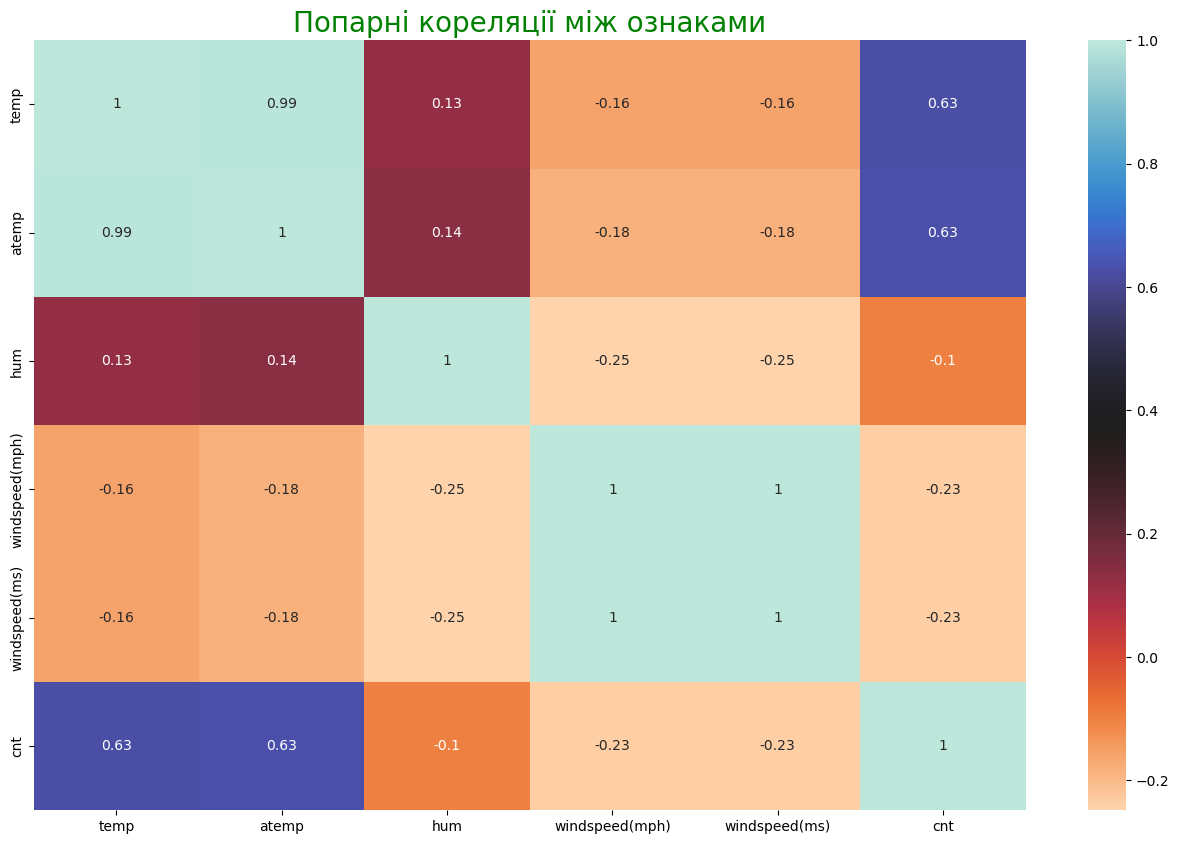

In [16]:
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(df.iloc[:, 7:].corr(), annot=True, cmap='icefire_r')
plt.title('Попарні кореляції між ознаками', fontsize=20, color='g')
plt.show()

In [17]:
mean_features = df.mean()
print(mean_features)

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64


In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X = df.drop(columns=['cnt'])
y = df['cnt']
regressor.fit(X, y)
feature_names = df.columns[:-1]
coefficients = regressor.coef_
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

season: 514.2757015663954
yr: 2043.937499895518
mnth: -40.96324971851862
holiday: -519.3895390641574
weekday: 68.49560202791295
workingday: 121.29452237198859
weathersit: -606.4602424419659
temp: 48.99734615159841
atemp: 71.91309286915724
hum: -10.23025619299184
windspeed(mph): 2400641438973.261
windspeed(ms): -5370234899067.984


In [19]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge()
ridge_regressor.fit(X, y)
ridge_coefficients = ridge_regressor.coef_
print("Ridge регресор:")
for feature, coefficient in zip(feature_names, ridge_coefficients):
    print(f"{feature}: {coefficient}")

Ridge регресор:
season: 507.8018818505662
yr: 2029.089054197048
mnth: -38.47089727912181
holiday: -493.27801548381984
weekday: 69.11396965165967
workingday: 121.52442502929445
weathersit: -605.2055553731512
temp: 49.31676759598137
atemp: 71.78598727335147
hum: -10.383394500484703
windspeed(mph): -31.93550169444566
windspeed(ms): -14.276040263482143


In [20]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso()
lasso_regressor.fit(X, y)
lasso_coefficients = lasso_regressor.coef_
print("Lasso регресор:")
for feature, coefficient in zip(feature_names, lasso_coefficients):
    print(f"{feature}: {coefficient}")

Lasso регресор:
season: 506.5512786498076
yr: 2036.231667697903
mnth: -38.078270289321665
holiday: -484.6519461865403
weekday: 68.93837479133961
workingday: 118.44759758668337
weathersit: -604.5667118927047
temp: 51.36326058561633
atemp: 69.91273749012194
hum: -10.352705204636578
windspeed(mph): -38.34106761310848
windspeed(ms): -0.0


In [21]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge()
ridge_regressor.fit(X, y)
ridge_coefficients = ridge_regressor.coef_
print("Ridge регресор:")
for feature, coefficient in zip(feature_names, ridge_coefficients):
    print(f"{feature}: {coefficient}")

Ridge регресор:
season: 507.8018818505662
yr: 2029.089054197048
mnth: -38.47089727912181
holiday: -493.27801548381984
weekday: 69.11396965165967
workingday: 121.52442502929445
weathersit: -605.2055553731512
temp: 49.31676759598137
atemp: 71.78598727335147
hum: -10.383394500484703
windspeed(mph): -31.93550169444566
windspeed(ms): -14.276040263482143


In [22]:
alphas = [0.1, 1, 10, 100, 1000]

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X, y)
    coefs_lasso.append(lasso_regressor.coef_)
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X, y)
    coefs_ridge.append(ridge_regressor.coef_)
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

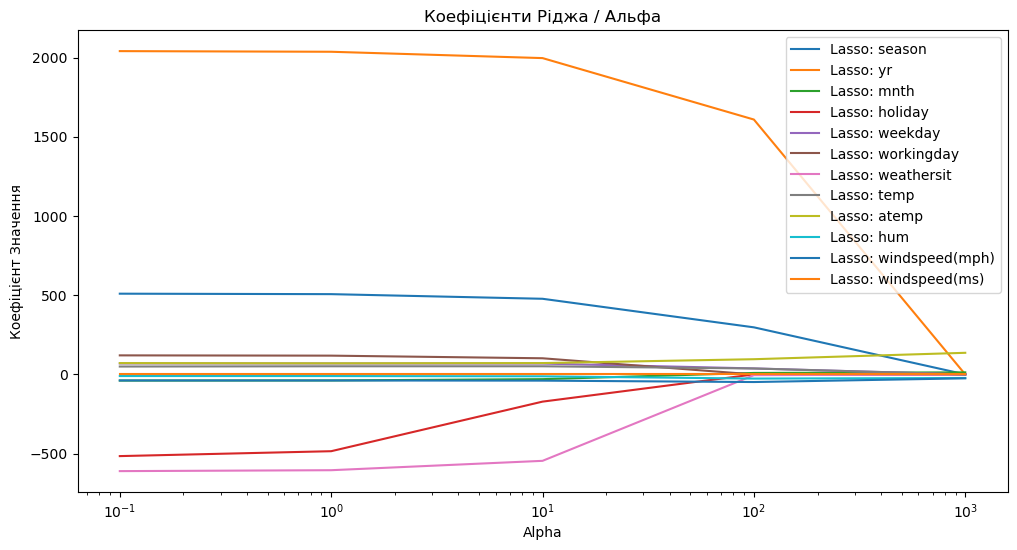

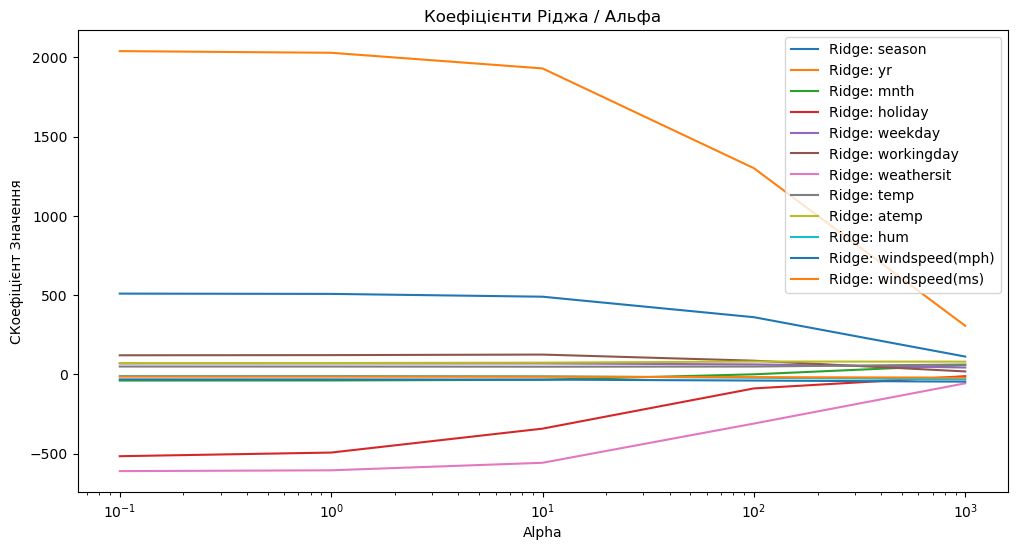

In [23]:
plt.figure(figsize=(12, 6))
for i in range(len(feature_names)):
    plt.plot(alphas, coefs_lasso[:, i], label=f"Lasso: {feature_names[i]}")

plt.xscale('log')
plt.title('Коефіцієнти Ріджа / Альфа')
plt.xlabel('Alpha')
plt.ylabel('Коефіцієнт Значення')
plt.legend()
plt.axis('tight')
plt.show()
plt.figure(figsize=(12, 6))
for i in range(len(feature_names)):
    plt.plot(alphas, coefs_ridge[:, i], label=f'Ridge: {feature_names[i]}')
plt.xscale('log')
plt.title('Коефіцієнти Ріджа / Альфа')
plt.xlabel('Alpha')
plt.ylabel('CКоефіцієнт Значення')
plt.legend()
plt.axis('tight')
plt.show()

Найкраще alpha: 1.0


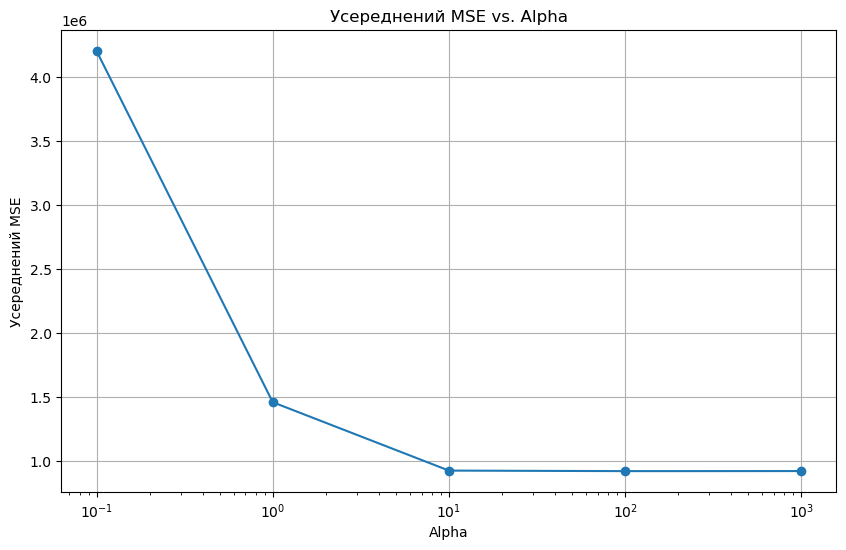

Навчені ваги:
season: 506.5512786498076
yr: 2036.231667697903
mnth: -38.078270289321665
holiday: -484.6519461865403
weekday: 68.93837479133961
workingday: 118.44759758668337
weathersit: -604.5667118927047
temp: 51.36326058561633
atemp: 69.91273749012194
hum: -10.352705204636578
windspeed(mph): -38.34106761310848
windspeed(ms): -0.0


In [24]:
from sklearn.linear_model import LassoCV

alphas = [0.1, 1, 10, 100, 1000]
lasso_cv_regressor = LassoCV(alphas=alphas, cv=3)
lasso_cv_regressor.fit(X, y)
best_alpha = lasso_cv_regressor.alpha_
print(f"Найкраще alpha: {best_alpha}")
mse_path = lasso_cv_regressor.mse_path_.mean(axis=1)
def create_plot(alphas, mse, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, mse, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xscale('log')
    plt.grid()
    plt.show()
create_plot(alphas, mse_path, "Усереднений MSE vs. Alpha", "Alpha", "Усереднений MSE")
lasso_cv_coefs = lasso_cv_regressor.coef_
print("Навчені ваги:")
for feature, coefficient in zip(feature_names, lasso_cv_coefs):
    print(f"{feature}: {coefficient}")

Значення alpha, що відповідають мінімумам MSE на кожному розбитті:
Розбиття 1: 0.1
Розбиття 2: 100.0
Розбиття 3: 0.1


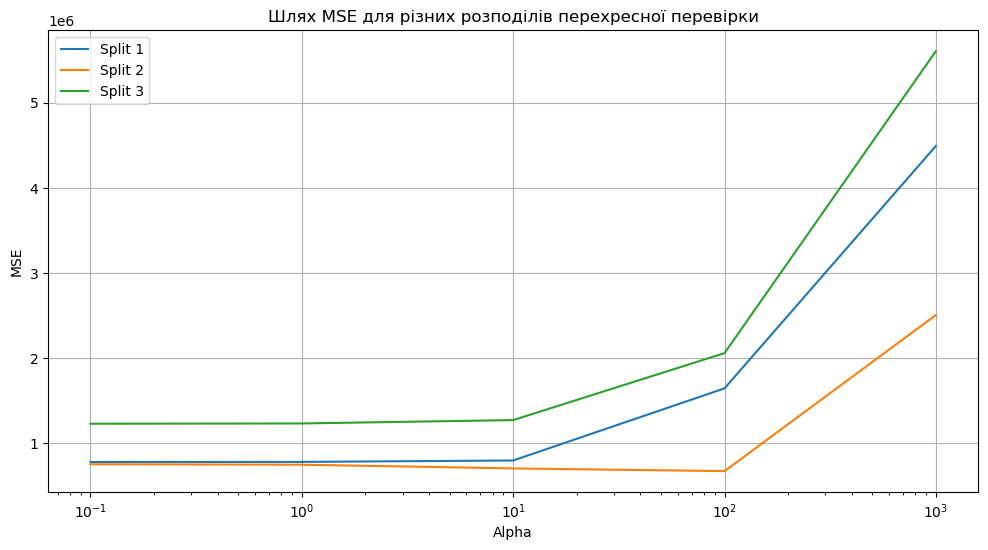

In [25]:
alphas = lasso_cv_regressor.alphas_
min_alpha_per_split = alphas[np.argmin(lasso_cv_regressor.mse_path_, axis=0)]
print("Значення alpha, що відповідають мінімумам MSE на кожному розбитті:")
for split, alpha in enumerate(min_alpha_per_split):
    print(f"Розбиття {split + 1}: {alpha}")
plt.figure(figsize=(12, 6))
for split, mse_values in enumerate(lasso_cv_regressor.mse_path_.T):
    plt.plot(alphas, mse_values, label=f"Split {split + 1}")
plt.title('Шлях MSE для різних розподілів перехресної перевірки')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

In [26]:
top_feature_indices = np.argsort(lasso_cv_coefs)[-4:][::-1]
top_features = [(feature_names[i], lasso_cv_coefs[i]) for i in top_feature_indices]
print("4 ознаки з найбільшими позитивними коефіцієнтами:")
for feature, coefficient in top_features:
    print(f"{feature}: {coefficient}")

4 ознаки з найбільшими позитивними коефіцієнтами:
yr: 2036.231667697903
season: 506.5512786498076
workingday: 118.44759758668337
atemp: 69.91273749012194


In [27]:
top_negative_feature_indices = np.argsort(np.abs(lasso_cv_coefs))[:3]
top_negative_features = [(feature_names[i], lasso_cv_coefs[i]) for i in top_negative_feature_indices]
print("3 ознаки з найбільшими за модулем негативними коефіцієнтами:")
for feature, coefficient in top_negative_features:
    print(f"{feature}: {coefficient}")

3 ознаки з найбільшими за модулем негативними коефіцієнтами:
windspeed(ms): -0.0
hum: -10.352705204636578
mnth: -38.078270289321665


In [28]:
windspeed_ms = -0.0
